<a href="https://colab.research.google.com/github/gcbicca/exerc_bioinfo/blob/main/aulaBiopython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 28.9 MB/s eta 0:00:00


In [ ]:
from Bio.Seq import Seq

In [ ]:
dnaM = Seq('ATGCGGCGATCCGCGATGCGATGCGTATATAAA')

In [ ]:
dnaM

Seq('ATGCGGCGATCCGCGATGCGATGCGTATATAAA')

In [ ]:
dnaC = dnaM.complement()

In [ ]:
dnaC

Seq('TACGCCGCTAGGCGCTACGCTACGCATATATTT')

In [ ]:
rnaMen= dnaC.transcribe()

In [ ]:
rnaMen

Seq('UACGCCGCUAGGCGCUACGCUACGCAUAUAUUU')

In [ ]:
prot = rnaMen.translate()
# Posso usar o to_stop=True para parar no stop codon

In [ ]:
prot

Seq('YAARRYATHIF')

In [ ]:
from Bio import pairwise2

/usr/local/lib/python3.8/dist-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [ ]:
seq1 = Seq("ATGGTCTACATAGCTGACAAACAGCACGTAGCAATCGGTCGAATCTCGAGAGGCATATGGTCACATGATCGGTCGAGCGTGTTTCAAAGTTTGCGCCTAG")
seq2 = Seq("ATCGGTCGAA")

In [ ]:
align = pairwise2.align.globalms(seq1,seq2, 5, -4, -2, -0.5)

In [ ]:
align

[Alignment(seqA='ATGGTCTACATAGCTGACAAACAGCACGTAGCAATCGGTCGAATCTCGAGAGGCATATGGTCACATGATCGGTCGAGCGTGTTTCAAAGTTTGCGCCTAG', seqB='-------------------------------------------------------------------ATCGGTCGAGCGTGT------------------', score=29.5, start=0, end=100),
 Alignment(seqA='ATGGTCTACATAGCTGACAAACAGCACGTAGCAATCGGTCGAATCTCGAGAGGCATATGGTCACATGATCGGTCGAGCGTGTTTCAAAGTTTGCGCCTAG', seqB='A-------------------------------------------------------------------TCGGTCGAGCGTGT------------------', score=29.5, start=0, end=100),
 Alignment(seqA='ATGGTCTACATAGCTGACAAACAGCACGTAGCAATCGGTCGAATCTCGAGAGGCATATGGTCACATGATCGGTCGAGCGTGTTTCAAAGTTTGCGCCTAG', seqB='AT-------------------------------------------------------------------CGGTCGAGCGTGT------------------', score=29.5, start=0, end=100)]

In [ ]:
print(pairwise2.format_alignment(*align[0]))

ATGGTCTACATAGCTGACAAACAGCACGTAGCAATCGGTCGAATCTCGAGAGGCATATGGTCACATGATCGGTCGAGCGTGTTTCAAAGTTTGCGCCTAG
                                 ||||||||||                                                         
---------------------------------ATCGGTCGAA---------------------------------------------------------
  Score=2



In [ ]:
from Bio.Align import substitution_matrices as sm

In [ ]:
blosum62 = sm.load("BLOSUM62")

In [ ]:
blosum62

In [ ]:
import random
from Bio.Data.IUPACData import protein_letters_1to3

# Lista de todos os aminoácidos
amino_acids = list(protein_letters_1to3.keys())

# Tamanho da seqüência aleatória a ser gerada
length = 100

# Gera a seqüência aleatória
rand_seq = ''.join(random.choices(amino_acids, k=length))

print("Seqüência aleatória de aminoácidos:")
print(rand_seq)


Seqüência aleatória de aminoácidos:
SAQYKNKSASMWRTGWRHDVCEMVIGWHYQSASSDLDMILLGVTPKNLSDLHWKYARKVILYCAPRNFDFVIHSSTAGVWHVAHWQYTQCVGFGCEPIYM


In [ ]:
seq1 = Seq('SERYMDCCNSTEFSERTYAFCVTAPQWINYYMMQFPAWLGCGKNIADPYHEYNIKWHFARSQDTDGAVCVDCPSAVAAHLSVWWEEGKGLITLPKDWRPA')
seq2 = Seq("SAQYKNKSASMWRTGWRHDVCEMVIGWHYQSASSDLDMILLGVTPKNLSDLHWKYARKVILYCAPRNFDFVIHSSTAGVWHVAHWQYTQCVGFGCEPIYM")

In [ ]:
align = pairwise2.align.globaldx(seq1,seq2, blosum62)

In [ ]:
align[0]

Alignment(seqA='S-ERYMDCC-N-STEF-SE--RT-YAF----C--VTAPQ--WINYYMMQFP-AW---LGC-----G---KNIADPY-HEYNIKWH-FARSQDTDGAVCVD--C-P-SA---VAA-HLS----VW----WE--E--GK-GLITLPK-DWRPA---', seqB='SAQ-Y----KNKS---AS-MWRTGW--RHDVCEMV----IGW--HY--Q--SA-SSDL--DMILLGVTPKNLSD--LH-----W-KYAR-K-----V-I-LYCAPRN-FDFV--IH-SSTAGVWHVAHWQYTQCVG-FG------CE--P-IYM', score=234.0, start=0, end=154)

In [ ]:
print(pairwise2.format_alignment(*align[0]))

S-ERYMDCC-N-STEF-SE--RT-YAF----C--VTAPQ--WINYYMMQFP-AW---LGC-----G---KNIADPY-HEYNIKWH-FARSQDTDGAVCVD--C-P-SA---VAA-HLS----VW----WE--E--GK-GLITLPK-DWRPA---
| . |     | |    |   || .      |  |      |  .|  |   |    |       |   ||..|   |     |  .|| .     | .   | | .    |   | |    ||    |.  .  |  |       .  |    
SAQ-Y----KNKS---AS-MWRTGW--RHDVCEMV----IGW--HY--Q--SA-SSDL--DMILLGVTPKNLSD--LH-----W-KYAR-K-----V-I-LYCAPRN-FDFV--IH-SSTAGVWHVAHWQYTQCVG-FG------CE--P-IYM
  Score=234



In [ ]:
from Bio import Entrez
from Bio import SeqIO
"""O código acima importa duas bibliotecas do pacote Biopython: Entrez e SeqIO.

A biblioteca Entrez é usada para acessar os dados de sequências de DNA e proteínas armazenados no banco de dados do NCBI 
(National Center for Biotechnology Information). Ela fornece uma interface para acessar vários bancos de dados do NCBI, como o GenBank, 
e permite buscar, baixar e processar informações sobre sequências biológicas.

A biblioteca SeqIO é usada para manipular as sequências biológicas que são baixadas usando a biblioteca Entrez. Ela permite a leitura, escrita 
e conversão de sequências biológicas em vários formatos, incluindo FASTA, GenBank, entre outros. Além disso, a biblioteca SeqIO permite manipular as 
sequências, como rotações, inverções, transcrições, entre outras operações."""

'O código acima importa duas bibliotecas do pacote Biopython: Entrez e SeqIO.\n\nA biblioteca Entrez é usada para acessar os dados de sequências de DNA e proteínas armazenados no banco de dados do NCBI \n(National Center for Biotechnology Information). Ela fornece uma interface para acessar vários bancos de dados do NCBI, como o GenBank, \ne permite buscar, baixar e processar informações sobre sequências biológicas.\n\nA biblioteca SeqIO é usada para manipular as sequências biológicas que são baixadas usando a biblioteca Entrez. Ela permite a leitura, escrita \ne conversão de sequências biológicas em vários formatos, incluindo FASTA, GenBank, entre outros. Além disso, a biblioteca SeqIO permite manipular as \nsequências, como rotações, inverções, transcrições, entre outras operações.'

In [ ]:
Entrez.email = 'biccg@gmail.com'

In [ ]:
handle = Entrez.esearch(db = 'nucleotide', term= 'SARS-CoV-2 human', retmax='10')
record = Entrez.read(handle)
"""Esse código está realizando uma busca no banco de dados "nucleotide" do NCBI (National Center for Biotechnology Information) usando a biblioteca BioPython.

A função "Entrez.esearch" é usada para buscar informações no banco de dados. Alguns dos parâmetros que podem ser passados são "db" (banco de dados a ser pesquisado), "term" (termo a ser pesquisado) e "retmax" (número máximo de resultados a serem retornados).

A função "Entrez.read" é usada para ler o resultado da busca em formato XML e retornar um objeto python com as informações relevantes.

Nesse exemplo, a busca está sendo feita para o termo "SARS-CoV-2 human", e o retorno máximo será de 10 resultados."""

In [ ]:
record

{'Count': '3338260', 'RetMax': '10', 'RetStart': '0', 'IdList': ['2437982566', '2437982553', '2437982540', '2437982528', '2437982515', '2437982502', '2437982489', '2437982477', '2437982465', '2437982452'], 'TranslationSet': [{'From': 'SARS-CoV-2', 'To': '"Severe acute respiratory syndrome coronavirus 2"[Organism] OR SARS-CoV-2[All Fields]'}, {'From': 'human', 'To': '"Homo sapiens"[Organism] OR human[All Fields]'}], 'TranslationStack': [{'Term': '"Severe acute respiratory syndrome coronavirus 2"[Organism]', 'Field': 'Organism', 'Count': '6686264', 'Explode': 'Y'}, {'Term': 'SARS-CoV-2[All Fields]', 'Field': 'All Fields', 'Count': '5260673', 'Explode': 'N'}, 'OR', 'GROUP', {'Term': '"Homo sapiens"[Organism]', 'Field': 'Organism', 'Count': '28312015', 'Explode': 'Y'}, {'Term': 'human[All Fields]', 'Field': 'All Fields', 'Count': '54902972', 'Explode': 'N'}, 'OR', 'GROUP', 'AND', 'GROUP'], 'QueryTranslation': '("Severe acute respiratory syndrome coronavirus 2"[Organism] OR SARS-CoV-2[All F

In [ ]:
record['IdList']

['2437982566', '2437982553', '2437982540', '2437982528', '2437982515', '2437982502', '2437982489', '2437982477', '2437982465', '2437982452']

In [ ]:
seq_handle = Entrez.efetch(db='nucleotide', rettype='fasta', id=record['IdList'])
seq_record = SeqIO.parse(seq_handle, 'fasta')
SeqIO.write(seq_record, 'covHuman.fasta', 'fasta')
"""Esse código está baixando sequências genômicas do NCBI (National Center for Biotechnology Information) usando a biblioteca BioPython.

A função "Entrez.efetch" é usada para baixar as sequências específicas de acordo com seus identificadores. Alguns dos parâmetros que podem ser passados são "db" (banco de dados a ser pesquisado), "rettype" (formato do retorno) e "id" (identificadores das sequências a serem baixadas).

A função "SeqIO.parse" é usada para ler o resultado da busca em formato fasta e retornar um objeto python com as informações relevantes.

A função "SeqIO.write" é usada para salvar as sequências baixadas em um arquivo no formato fasta.

Nesse exemplo, as sequências genômicas relacionadas a "SARS-CoV-2 human" são baixadas do banco de dados "Nucleotide" no formato "fasta", e são salvas em um arquivo chamado "covHuman.fasta".



"""

In [ ]:
arq = open('covHuman.fasta', 'r')
seqs= []
for s in SeqIO.parse(arq, 'fasta'):
  seqs.append(s)

In [ ]:
seqs[0]

SeqRecord(seq=Seq('TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCT...GTA'), id='OQ355523.1', name='OQ355523.1', description='OQ355523.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/USA/NY_MEDDAC_FD_643/2023, complete genome', dbxrefs=[])

In [ ]:
seqs[1].seq

Seq('TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCT...GTA')

In [ ]:
seqs[1].seq.complement()

Seq('AACATCTAGACAAGAGATTTGCTTGAAATTTTAGACACACCGACAGTGAGCCGA...CAT')

In [ ]:
seqs[1].seq.transcribe()

Seq('UUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACUCGGCU...GUA')

In [ ]:
seqs[0].seq.transcribe().translate()

Seq('L*ICSLNEL*NLCGCHSAACLVHSRSIINN*LLSLTGHE*LVYLLQAAYGFVRV...ILV')

In [ ]:
from Bio.SeqUtils import GC

In [ ]:
gc = GC(seqs[0].seq)

/usr/local/lib/python3.8/dist-packages/Bio/SeqUtils/__init__.py:144: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  warnings.warn(


In [ ]:
gc

37.88949458240797

In [ ]:
seq_handle = Entrez.efetch(db='nucleotide', rettype='gb', id='45478711')

In [ ]:
seq_record = SeqIO.parse(seq_handle, 'gb')

In [ ]:
SeqIO.write(seq_record, 'NC_005816.gb', 'gb')

1

In [ ]:
# vai baixar a biblioteca ipython o modulo diplay e o modulo image
from IPython.display import Image
"""from IPython.display import Image é uma importação de uma classe da biblioteca IPython, que permite exibir imagens dentro de um Jupyter Notebook. Com isso, 
você pode exibir uma imagem na
 célula do notebook bastando utilizar o código Image(filename='nome_do_arquivo.extensao')."""

"from IPython.display import Image é uma importação de uma classe da biblioteca IPython, que permite exibir imagens dentro de um Jupyter Notebook. Com isso, \nvocê pode exibir uma imagem na\n célula do notebook bastando utilizar o código Image(filename='nome_do_arquivo.extensao')."

In [ ]:
!pip install reportlab
"""O ReportLab é uma biblioteca de código aberto para geração de documentos em PDF, popularmente utilizada para criação de relatórios. 
Ele possui uma ampla variedade de recursos, incluindo suporte para fontes TrueType, incluir imagens, desenhar formas, adicionar tabelas e muito mais. Além disso, 
ele é altamente personalizável e permite ajustar a aparência dos documentos de acordo com suas necessidades. Com o ReportLab, é possível criar documentos dinâmicos que possam 
ser gerados a partir de dados 
em tempo real, ou a partir de um modelo pré-estabelecido."""

In [ ]:
from Bio.Graphics import GenomeDiagram

In [ ]:
from reportlab.lib import colors

In [ ]:
from reportlab.lib.units import cm

In [ ]:
record = SeqIO.read('NC_005816.gb', 'gb')

In [ ]:
record

SeqRecord(seq=Seq(None, length=9609), id='NC_005816.1', name='NC_005816', description='Yersinia pestis biovar Microtus str. 91001 plasmid pPCP1, complete sequence', dbxrefs=['BioProject:PRJNA224116', 'BioSample:SAMN02602970', 'Assembly:GCF_000007885.1'])

In [ ]:
record.features

In [ ]:
gd_diagram = GenomeDiagram.Diagram("Yersinia pestis biovar Microtus pPCP1")
"""O código é uma criação de um objeto do tipo Diagram, da biblioteca GenomeDiagram, para representar uma sequência de DNA.
 O objeto é criado com o título "Yersinia pestis biovar Microtus pPCP1". Esse título pode ser usado para identificar o diagrama ou o objeto de seqüência de DNA que ele representa. 
A biblioteca GenomeDiagram é uma ferramenta para visualização e manipulação de informações genômicas."""

'O código é uma criação de um objeto do tipo Diagram, da biblioteca GenomeDiagram, para representar uma sequência de DNA.\n O objeto é criado com o título "Yersinia pestis biovar Microtus pPCP1". Esse título pode ser usado para identificar o diagrama ou o objeto de seqüência de DNA que ele representa. \nA biblioteca GenomeDiagram é uma ferramenta para visualização e manipulação de informações genômicas.'

In [ ]:
gd_track_for_features = gd_diagram.new_track(1, name= 'Annotated Features')
"""O código acima está criando uma nova trilha para armazenar características anotadas em um diagrama de genoma. 
O método new_track é um método do objeto Diagram da biblioteca GenomeDiagram. O argumento 1 é o nível da trilha 
(1 significa que a trilha ficará no topo do diagrama) e o argumento name é o nome da trilha que será exibido na legenda do diagrama."""

'O código acima está criando uma nova trilha para armazenar características anotadas em um diagrama de genoma. \nO método new_track é um método do objeto Diagram da biblioteca GenomeDiagram. O argumento 1 é o nível da trilha \n(1 significa que a trilha ficará no topo do diagrama) e o argumento name é o nome da trilha que será exibido na legenda do diagrama.'

In [ ]:
gd_features_set = gd_track_for_features.new_set()

In [ ]:
# diferencia em azul ou lightblue dependendo do tamanho da feature
# desenhar o diagrama
for feature in record.features:
  if feature.type != 'gene':
    continue
  #if len(gd_features_set) % 2 == 0:
    #color = colors.blue
  #else:
    #color = colors.lightblue
  gd_features_set.add_feature(feature, color='blue', label=True, sigil='BOX')

In [ ]:
gd_diagram.draw(format='circular', circular=True, pagesize=(20*cm, 20*cm),
                start=0, end=len(record), circle_core= 0.7)


In [ ]:
gd_diagram.write('plasmid_circular.png','png')

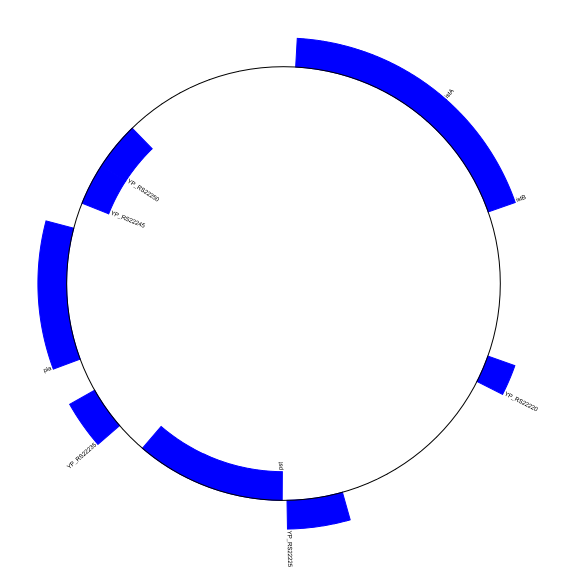

In [ ]:
Image(filename='plasmid_circular.png')

In [ ]:
from Bio.Blast import NCBIWWW
from Bio import SearchIO

In [ ]:
arq = SeqIO.read('exemplo.fasta', format='fasta')

In [ ]:
resultBlast = NCBIWWW.qblast('blastn', 'nt', arq.seq)

blast_qresult = SearchIO.read(resultBlast, 'blast-xml')
print(blast_qresult)

Program: blastn (2.13.0+)
  Query: No (620)
         definition line
 Target: nt
   Hits: ----  -----  ----------------------------------------------------------
            #  # HSP  ID + description
         ----  -----  ----------------------------------------------------------
            0      1  gi|1542862221|ref|XM_027538800.1|  PREDICTED: Bos indic...
            1      1  gi|1131145074|ref|XM_019958446.1|  PREDICTED: Bos indic...
            2      1  gi|31342400|ref|NM_174292.2|  Bos taurus crystallin gam...
            3      1  gi|942100335|ref|XM_005910756.2|  PREDICTED: Bos mutus ...
            4      1  gi|742178622|ref|XM_010853890.1|  PREDICTED: Bison biso...
            5      1  gi|2148341035|ref|XM_006058622.4|  PREDICTED: Bubalus b...
            6      1  gi|1187561296|ref|XM_020878820.1|  PREDICTED: Odocoileu...
            7      1  gi|1187561294|ref|XM_020878819.1|  PREDICTED: Odocoileu...
            8      1  gi|2101993595|ref|XM_043874320.1|  PREDICTED: Ce

/usr/local/lib/python3.8/dist-packages/Bio/SearchIO/_legacy/__init__.py:12: BiopythonDeprecationWarning: The 'Bio.SearchIO._legacy' module for parsing BLAST plain text output is deprecated and will be removed in a future release of Biopython. Consider generating your BLAST output for parsing as XML or tabular format instead.
  warnings.warn(


In [ ]:
resultBlast = NCBIWWW.qblast('blastn', 'nt', arq.seq, format_type='Text')
# ou posso colocar  Seq('atggcgcgc')

In [ ]:
from Bio.KEGG import REST
result = REST.kegg_info("kegg").read()
# Posso usar o kegg_list ex: 'drug'

In [ ]:
print(result)

kegg             Kyoto Encyclopedia of Genes and Genomes
kegg             Release 105.0+/02-03, Feb 23
                 Kanehisa Laboratories
                 pathway   1,009,699 entries
                 brite       339,662 entries
                 module          550 entries
                 orthology    25,615 entries
                 genome       20,603 entries
                 genes     45,817,444 entries
                 compound     19,057 entries
                 glycan       11,147 entries
                 reaction     11,874 entries
                 rclass        3,194 entries
                 enzyme        8,056 entries
                 network       1,484 entries
                 variant         898 entries
                 disease       2,620 entries
                 drug         12,061 entries
                 dgroup        2,418 entries



In [ ]:
result = REST.kegg_find('genes','Herbaspirillum').read()
# ex: 'Genes"
# ex: 'disease' 'covid'

In [ ]:
result

'kpnk:BN49_2491\tqor; highly similar to putative NADPH:quinone oxidoreductase protein from Herbaspirillum seropedicae (tr|A2RQ31)\ngms:SOIL9_51540\tmethyl-accepting chemotaxis protein : Putative periplasmic ligand-binding sensor domain protein OS=Herbaspirillum sp. CF444 GN=PMI16_01711 PE=4 SV=1: CHASE3: MCPsignal\ngms:SOIL9_51520\tchemotaxis protein : Chemotaxis response regulator protein-glutamate methylesterase OS=Herbaspirillum sp. CF444 GN=cheB PE=3 SV=1: Response_reg: CheB_methylest\ngms:SOIL9_32850\tglyoxalase bleomycin resistance protein dioxygenase : Glyoxylase I family protein OS=Herbaspirillum frisingense GSF30 GN=HFRIS_003763 PE=4 SV=1: Glyoxalase\ntim:GMBLW1_40640\tpoly(3-hydroxybutyrate) depolymerase : Poly(3-hydroxybutyrate) depolymerase OS=Herbaspirillum sp. YR522 GN=PMI40_02532 PE=4 SV=1: Abhydrolase_2\n'

In [ ]:
result = REST.kegg_find('compound','Glutathione').read()


In [ ]:
result

'cpd:C00051\tGlutathione; 5-L-Glutamyl-L-cysteinylglycine; N-(N-gamma-L-Glutamyl-L-cysteinyl)glycine; gamma-L-Glutamyl-L-cysteinyl-glycine; GSH; Reduced glutathione\ncpd:C00127\tGlutathione disulfide; GSSG; Oxiglutatione; Oxidized glutathione\ncpd:C00920\tCoA-glutathione; Coenzyme A-glutathione mixed disulfide\ncpd:C01031\tS-Formylglutathione\ncpd:C02320\tR-S-Glutathione\ncpd:C02589\tS-Acylglutathione\ncpd:C02886\tS-Hexyl-glutathione; S-Hexyl-L-glutathione\ncpd:C03174\tS-Succinylglutathione\ncpd:C03451\t(R)-S-Lactoylglutathione; S-D-Lactoylglutathione\ncpd:C03899\tS-(2-Hydroxyacyl)glutathione\ncpd:C03928\t3-Phosphoglycerol-glutathione\ncpd:C04572\tS-(N-Hydroxy-N-methylcarbamoyl)glutathione\ncpd:C11175\tS-(2,4-Dinitrophenyl)glutathione\ncpd:C11302\tS-Octyl GSH; S-Octyl glutathione\ncpd:C11303\tS-Decyl GSH; S-Decyl glutathione\ncpd:C11304\tS-(PGA1)-glutathione\ncpd:C11315\tS-(4-Azidophenacyl)glutathione; S-(p-Azidophenacyl)glutathione\ncpd:C11347\tS-Methyl GSH; S-Methylglutathione\ncpd:C

In [ ]:
result = REST.kegg_get('cpd:C00051').read()


In [ ]:
print(result)

In [ ]:
result = REST.kegg_get('cpd:C00051', 'image').read()


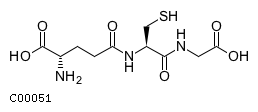

In [ ]:
Image(result)

In [ ]:
result = REST.kegg_find('pathway', 'Fatty+acid+biosynthesis').read()


In [ ]:
print(result)

path:map00061	Fatty acid biosynthesis
path:map01040	Biosynthesis of unsaturated fatty acids



In [ ]:
result = REST.kegg_get('map00061', 'image').read()

In [ ]:
Image(result)

In [ ]:
from Bio.KEGG import Enzyme

In [ ]:
request = REST.kegg_get('ec:5.4.2.2')

In [ ]:
f = open('ec_5422.txt', 'w')

In [ ]:
f.write(request.read())
f.close()

In [ ]:
records =  Enzyme.parse(open('ec_5422.txt'))

In [ ]:
record = list(records)[0]

In [ ]:
record

In [ ]:
record.name

['phosphoglucomutase (alpha-D-glucose-1,6-bisphosphate-dependent)',
 'glucose phosphomutase (ambiguous)',
 'phosphoglucose mutase (ambiguous)']

In [ ]:
record.entry

'5.4.2.2'

In [ ]:
record.classname

['Isomerases;',
 'Intramolecular transferases;',
 'Phosphotransferases (phosphomutases)']

In [ ]:
record.pathway

[('PATH', 'ec00010', 'Glycolysis / Gluconeogenesis'),
 ('PATH', 'ec00030', 'Pentose phosphate pathway'),
 ('PATH', 'ec00052', 'Galactose metabolism'),
 ('PATH', 'ec00230', 'Purine metabolism'),
 ('PATH', 'ec00500', 'Starch and sucrose metabolism'),
 ('PATH', 'ec00520', 'Amino sugar and nucleotide sugar metabolism'),
 ('PATH', 'ec00521', 'Streptomycin biosynthesis'),
 ('PATH', 'ec01100', 'Metabolic pathways'),
 ('PATH', 'ec01110', 'Biosynthesis of secondary metabolites'),
 ('PATH', 'ec01120', 'Microbial metabolism in diverse environments')]

In [ ]:
record.reaction

['alpha-D-glucose 1-phosphate = D-glucose 6-phosphate [RN:R08639]']

In [ ]:
record.substrate

['alpha-D-glucose 1-phosphate [CPD:C00103]']

In [ ]:
record.product

['D-glucose 6-phosphate [CPD:C00092]']

In [ ]:
record.genes

In [ ]:
from Bio.PDB import *

In [ ]:
pdb = PDBList()
# objeto pdb list criado

In [ ]:
pdb.retrieve_pdb_file('2FAT', pdir='.', file_format='mmCif')
# busca no pdb, atraves do objeto criado anteriormente

'./2fat.cif'

In [ ]:
parser = MMCIFParser(QUIET=True)
#criando um objeto parser para ler o arquivo baixado

In [ ]:
struct = parser.get_structure('2FAT', '2fat.cif')
# criando a estrutura e utiliza o objeto criado

In [ ]:
struct

<Structure id=2FAT>

In [ ]:
struct.header

{'name': 'An anti-urokinase plasminogen activator receptor (UPAR) antibody: Crystal structure and binding epitope',
 'head': 'IMMUNE SYSTEM',
 'idcode': '2FAT',
 'deposition_date': '2005-12-07',
 'structure_method': 'X-RAY DIFFRACTION',
 'resolution': 1.77}

In [ ]:
struct.header['resolution']

1.77

In [ ]:
struct[0]

<Model id=0>

In [ ]:
model = struct.get_models()

In [ ]:
model

<generator object Structure.get_models at 0x7f5bf9042eb0>

In [ ]:
models = list(model)

In [ ]:
models

[<Model id=0>]

In [ ]:
chains = list(models[0].get_chains())

In [ ]:
chains

[<Chain id=L>, <Chain id=H>]

In [ ]:
residueL= list(chains[0].get_residues())
residueH= list(chains[1].get_residues())

In [ ]:
residueL

In [ ]:
residueH[5].resname

'GLN'

In [ ]:
atoms = list(residueL[0].get_atoms())

In [ ]:
atoms

[<Atom N>,
 <Atom CA>,
 <Atom C>,
 <Atom O>,
 <Atom CB>,
 <Atom CG>,
 <Atom OD1>,
 <Atom OD2>]

In [ ]:
atoms[0]

<Atom N>

In [ ]:
atoms[0].name

'N'

In [ ]:
atoms[0].coord

array([18.487, 73.26 , 44.156], dtype=float32)

In [ ]:
atoms[0].get_vector()


<Vector 18.49, 73.26, 44.16>

In [ ]:
atoms[0]-atoms[2]

2.4931633